In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 6

In [3]:
streets = make_array('Bancroft', 'Durant', 'Channing', 'Haste', 'Dwight')

In [4]:
southside = Table().with_column(
    'Street', streets,
    'Blocks from Campus', np.arange(5)
)

In [5]:
southside

Street   | Blocks from Campus
Bancroft | 0
Durant   | 1
Channing | 2
Haste    | 3
Dwight   | 4

In [6]:
southside.select('Street')

Street
Bancroft
Durant
Channing
Haste
Dwight

In [7]:
southside.column('Street')

array(['Bancroft', 'Durant', 'Channing', 'Haste', 'Dwight'], dtype='<U8')

In [8]:
oneway = make_array(True, True, False, True, True)
southside = southside.with_column('One Way', oneway)

In [9]:
southside

Street   | Blocks from Campus | One Way
Bancroft | 0                  | True
Durant   | 1                  | True
Channing | 2                  | False
Haste    | 3                  | True
Dwight   | 4                  | True

In [11]:
southside.where('Blocks from Campus', are.above(0)).num_rows

4

In [14]:
np.count_nonzero(southside.column('Blocks from Campus'))

4

In [15]:
np.count_nonzero(southside.column('One Way'))

4

## Discussion

In [16]:
nba = Table.read_table('nba_salaries.csv')
nba = nba.relabeled(3, 'SALARY').drop('TEAM')

In [17]:
nba 

PLAYER           | POSITION | SALARY
Paul Millsap     | PF       | 18.6717
Al Horford       | C        | 12
Tiago Splitter   | C        | 9.75625
Jeff Teague      | PG       | 8
Kyle Korver      | SG       | 5.74648
Thabo Sefolosha  | SF       | 4
Mike Scott       | PF       | 3.33333
Kent Bazemore    | SF       | 2
Dennis Schroder  | PG       | 1.7634
Tim Hardaway Jr. | SG       | 1.30452
... (407 rows omitted)

In [18]:
nba.where('SALARY', are.above(15)).where('POSITION', 'PG').column('PLAYER')

array(['Derrick Rose', 'Kyrie Irving', 'Chris Paul', 'Russell Westbrook',
       'John Wall'], dtype='<U24')

In [19]:
nba.drop('POSITION')
nba.num_columns

3

In [20]:
nba.take(0)

PLAYER       | POSITION | SALARY
Paul Millsap | PF       | 18.6717

In [21]:
nba.take(np.arange(0))

PLAYER | POSITION | SALARY

## Census ##

In [23]:
full = Table.read_table('nc-est2014-agesex-res.csv')
full

SEX  | AGE  | CENSUS2010POP | ESTIMATESBASE2010 | POPESTIMATE2010 | POPESTIMATE2011 | POPESTIMATE2012 | POPESTIMATE2013 | POPESTIMATE2014
0    | 0    | 3944153       | 3944160           | 3951330         | 3963071         | 3926665         | 3945610         | 3948350
0    | 1    | 3978070       | 3978090           | 3957888         | 3966510         | 3978006         | 3943077         | 3962123
0    | 2    | 4096929       | 4096939           | 4090862         | 3971573         | 3979952         | 3992690         | 3957772
0    | 3    | 4119040       | 4119051           | 4111920         | 4102501         | 3983049         | 3992425         | 4005190
0    | 4    | 4063170       | 4063186           | 4077552         | 4122303         | 4112638         | 3994047         | 4003448
0    | 5    | 4056858       | 4056872           | 4064653         | 4087713         | 4132210         | 4123408         | 4004858
0    | 6    | 4066381       | 4066412           | 4073013         | 4074979         | 4097780         | 4143094         | 4134352
0    | 7    | 4030579       | 4030594           | 4043047         | 4083240         | 4084964         | 4108615         | 4154000
0    | 8    | 4046486       | 4046497           | 4025604         | 4053206         | 4093213         | 4095827         | 4119524
0    | 9    | 4148353       | 4148369           | 4125415         | 4035769         | 4063193         | 4104133         | 4106832
... (296 rows omitted)

In [24]:
partial = full.select('SEX', 'AGE', 'POPESTIMATE2010', 'POPESTIMATE2014')
partial

SEX  | AGE  | POPESTIMATE2010 | POPESTIMATE2014
0    | 0    | 3951330         | 3948350
0    | 1    | 3957888         | 3962123
0    | 2    | 4090862         | 3957772
0    | 3    | 4111920         | 4005190
0    | 4    | 4077552         | 4003448
0    | 5    | 4064653         | 4004858
0    | 6    | 4073013         | 4134352
0    | 7    | 4043047         | 4154000
0    | 8    | 4025604         | 4119524
0    | 9    | 4125415         | 4106832
... (296 rows omitted)

In [25]:
simple = partial.relabeled('POPESTIMATE2010', '2010').relabeled('POPESTIMATE2014','2014')
simple

SEX  | AGE  | 2010    | 2014
0    | 0    | 3951330 | 3948350
0    | 1    | 3957888 | 3962123
0    | 2    | 4090862 | 3957772
0    | 3    | 4111920 | 4005190
0    | 4    | 4077552 | 4003448
0    | 5    | 4064653 | 4004858
0    | 6    | 4073013 | 4134352
0    | 7    | 4043047 | 4154000
0    | 8    | 4025604 | 4119524
0    | 9    | 4125415 | 4106832
... (296 rows omitted)

In [26]:
simple.sort('AGE', descending=True)

SEX  | AGE  | 2010      | 2014
2    | 999  | 157257573 | 161920569
1    | 999  | 152089484 | 156936487
0    | 999  | 309347057 | 318857056
2    | 100  | 45058     | 58468
1    | 100  | 9351      | 13729
0    | 100  | 54409     | 72197
2    | 99   | 26074     | 32791
1    | 99   | 6104      | 9037
0    | 99   | 32178     | 41828
2    | 98   | 37533     | 46536
... (296 rows omitted)

## Visualization ##

In [27]:
no_999 = simple.where('AGE', are.below(999))

In [28]:
everyone = no_999.where('SEX', 0).drop('SEX')

In [29]:
everyone

AGE  | 2010    | 2014
0    | 3951330 | 3948350
1    | 3957888 | 3962123
2    | 4090862 | 3957772
3    | 4111920 | 4005190
4    | 4077552 | 4003448
5    | 4064653 | 4004858
6    | 4073013 | 4134352
7    | 4043047 | 4154000
8    | 4025604 | 4119524
9    | 4125415 | 4106832
... (91 rows omitted)

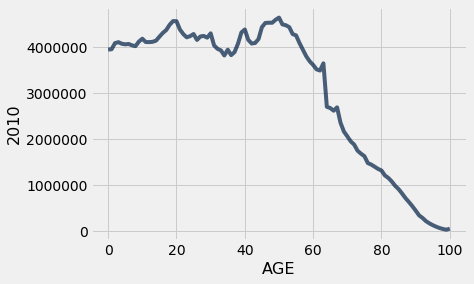

In [30]:
everyone.plot('AGE', '2010')